In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.trend import PolynomialTrendForecaster,PiecewiseLinearTrendForecaster
from sktime.transformations.series.detrend  import Deseasonalizer,Detrender
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

In [11]:
y =load_airline().to_timestamp(freq='M')
y_train, y_test = temporal_train_test_split(y)

# idx = pd.period_range(start=y_train.index[0], end= y_test.index[-1], freq="M")
# fh=ForecastingHorizon(idx, is_relative=False)
fh = ForecastingHorizon(y.index, is_relative=False)

In [12]:
pwl =  PiecewiseLinearTrendForecaster(changepoint_prior_scale=0.05, verbose=None)
y_pred_prophet = pwl.fit(y_train).predict(fh)

10:10:23 - cmdstanpy - INFO - Chain [1] start processing
10:10:24 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
poly = PolynomialTrendForecaster(degree=3)
y_pred_poly = poly.fit(y_train).predict(fh)

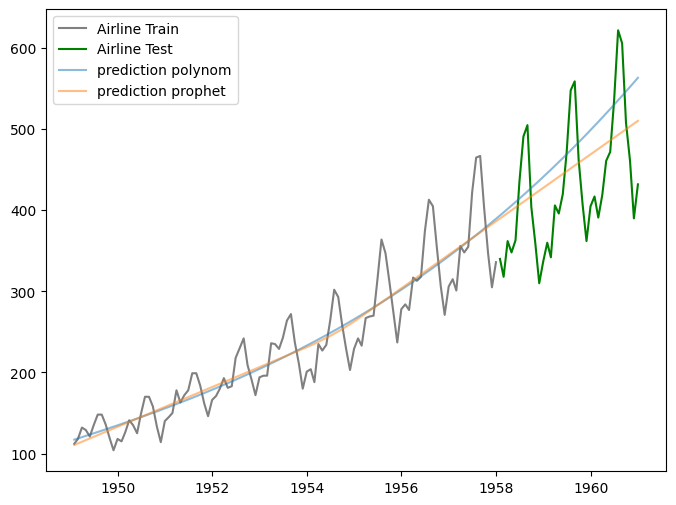

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(y_train, color='grey', label="Airline Train")
plt.plot(y_test, color='green', label="Airline Test")
plt.plot(y_pred_poly,label="prediction polynom", alpha=0.5)
plt.plot(y_pred_prophet,label="prediction prophet", alpha=0.5)
plt.legend()
plt.show()

In [16]:
from sklearn.metrics        import mean_absolute_error

fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred_prophet = pwl.predict(fh)
y_pred_poly = poly.predict(fh)

print("poly mae:",mean_absolute_error(y_test,y_pred_poly))
print("pwl mae:",mean_absolute_error(y_test,y_pred_prophet))

poly mae: 72.55924616340059
pwl mae: 61.487457754437656
